<a href="https://colab.research.google.com/github/dongzooo/BinanceAPI-FutureTrading-Order-book/blob/main/2_%EC%A2%85%EB%AA%A9%20%EB%B3%B4%EC%A1%B0%EC%A7%80%ED%91%9C%20%EB%B6%84%EC%84%9D/%ED%95%B4%EC%99%B8%EC%A3%BC%EC%8B%9D_RSI%2C_MDD_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --quiet

In [36]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [14]:
meta = yf.Ticker('META.OQ')
print(meta)

yfinance.Ticker object <META.OQ>


In [37]:
# 종목 코드 설정
pair = "TSLA"

# 특정 날짜 데이터 불러오기
start_date = "2021-01-01"
end_date = "2023-07-10"
data = yf.download(pair, start=start_date, end=end_date)

# 결과 출력
print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  239.820007  248.163330  239.063339  243.256668  243.256668   
2021-01-05  241.220001  246.946671  239.733337  245.036667  245.036667   
2021-01-06  252.830002  258.000000  249.699997  251.993332  251.993332   
2021-01-07  259.209991  272.329987  258.399994  272.013336  272.013336   
2021-01-08  285.333344  294.829987  279.463318  293.339996  293.339996   
...                ...         ...         ...         ...         ...   
2023-06-30  260.600006  264.450012  259.890015  261.769989  261.769989   
2023-07-03  276.489990  284.250000  275.109985  279.820007  279.820007   
2023-07-05  278.820007  283.850006  277.600006  282.480011  282.480011   
2023-07-06  278.089996  279.970001  272.880005  276.540009  276.540009   
2023-07-07  278.429993  280.779999  273.769

In [38]:
# 데이터프레임으로 변환
df = pd.DataFrame(data)

In [39]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30', '2023-07-03', '2023-07-05',
               '2023-07-06', '2023-07-07'],
              dtype='datetime64[ns]', name='Date', length=631, freq=None)

In [40]:
window = 90  # 3개월치
df['price_max'] = df['Close'].rolling(window, min_periods=1).max()
# df['price_max'] = df['Close'].rolling(window).max()

#07-2) 낙폭: drawdown
df['drawdown'] = (df['Close']/df['price_max'] - 1.0) * 100.

#07-3) 최대 낙폭 : MDD(maximum drawdown)
df['mdd'] = df['drawdown'].rolling(window, min_periods=1).min()
# df
df

,Open,High,Low,Close,Adj Close,Volume,price_max,drawdown,mdd
Date,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,243.256668,0.000000,0.000000
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,245.036667,0.000000,0.000000
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,251.993332,0.000000,0.000000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,272.013336,0.000000,0.000000
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,293.339996,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2023-06-30,260.600006,264.450012,259.890015,261.769989,261.769989,112267600,274.450012,-4.620158,-28.234692
2023-07-03,276.489990,284.250000,275.109985,279.820007,279.820007,119685900,279.820007,0.000000,-28.234692
2023-07-05,278.820007,283.850006,277.600006,282.480011,282.480011,131530900,282.480011,0.000000,-28.234692


In [53]:
def calculate_rsi(prices, period=14):
    deltas = np.diff(prices)
    seed = deltas[:period + 1]
    up = seed[seed >= 0].sum() / period
    down = -seed[seed < 0].sum() / period
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:period] = 100. - 100. / (1. + rs)

    for i in range(period, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter
        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up * (period - 1) + upval) / period
        down = (down * (period - 1) + downval) / period
        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)

    return rsi

df['rsi'] = calculate_rsi(df['Close'], period=14)

In [54]:
df

,Open,High,Low,Close,Adj Close,Volume,price_max,drawdown,mdd,rsi
Date,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,243.256668,0.000000,0.000000,71.389502
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,245.036667,0.000000,0.000000,71.389502
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,251.993332,0.000000,0.000000,71.389502
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,272.013336,0.000000,0.000000,71.389502
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,293.339996,0.000000,0.000000,71.389502
...,...,...,...,...,...,...,...,...,...,...
2023-06-30,260.600006,264.450012,259.890015,261.769989,261.769989,112267600,274.450012,-4.620158,-28.234692,65.361729
2023-07-03,276.489990,284.250000,275.109985,279.820007,279.820007,119685900,279.820007,0.000000,-28.234692,71.579834
2023-07-05,278.820007,283.850006,277.600006,282.480011,282.480011,131530900,282.480011,0.000000,-28.234692,72.367094


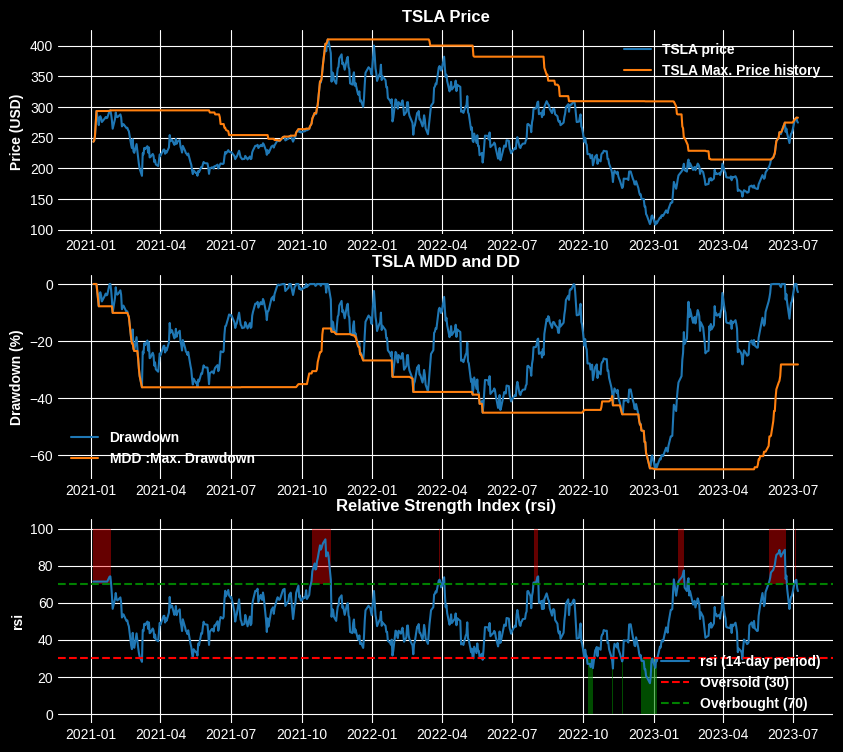

In [58]:
fig, axs = plt.subplots(3, 1, figsize=(10, 9))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('black')

axs[0].plot(df.index, df['Close'], label=pair + ' price')
axs[0].plot(df.index, df['price_max'], label=pair + ' Max. Price history')
axs[0].set_title(pair + ' Price', fontweight='bold', color='white')
axs[0].set_ylabel('Price (USD)', fontweight='bold', color='white')
axs[0].legend(loc='best', facecolor='black', edgecolor='white', labelcolor='white')
axs[0].grid(True)

axs[1].plot(df.index, df['drawdown'], label='Drawdown')
axs[1].plot(df.index, df['mdd'], label='MDD :Max. Drawdown')
axs[1].set_title(pair + ' MDD and DD', fontweight='bold', color='white')
axs[1].set_ylabel('Drawdown (%)', fontweight='bold', color='white')
axs[1].legend(loc='best', facecolor='black', edgecolor='white', labelcolor='white')
axs[1].grid(True)

axs[2].plot(df.index, df['rsi'], label='rsi (14-day period)')
axs[2].axhline(y=30, color='r', linestyle='--', label='Oversold (30)')
axs[2].axhline(y=70, color='g', linestyle='--', label='Overbought (70)')
axs[2].fill_between(df.index, 0, 30, where=(df['rsi'] <= 30), facecolor='green', alpha=0.6)
axs[2].fill_between(df.index, 70, 100, where=(df['rsi'] >= 70), facecolor='red', alpha=0.4)
axs[2].set_title('Relative Strength Index (rsi)', fontweight='bold', color='white')
axs[2].set_ylabel('rsi', fontweight='bold', color='white')
axs[2].legend(loc='best', facecolor='black', edgecolor='white', labelcolor='white')
axs[2].grid(True)

# 텍스트 색상 설정
for ax in axs:
    ax.title.set_color('white')
    ax.yaxis.label.set_color('white')
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_color('white')
    for text in ax.legend().get_texts():
        text.set_color('white')
        text.set_fontweight('bold')

plt.show()

In [26]:
def calculate_rsi(data, period=14):
    close_delta = data['Close'].diff()
    up = np.where(close_delta > 0, close_delta, 0)
    down = np.where(close_delta < 0, -close_delta, 0)
    avg_gain = pd.Series(up).rolling(window=period).mean()
    avg_loss = pd.Series(down).rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [ ]:
# dfBTC = pd.DataFrame(ohlcv, columns=['time_open', 'open', 'high', 'low', 'close', 'volume'])
# dfBTC = dfBTC.astype({'open': 'float', 'high': 'float', 'low': 'float', 'close': 'float', 'volume': 'float'})

In [27]:
df['rsi'] = calculate_rsi(df)

<ipython-input-28-e79fb366cb0d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-28-e79fb366cb0d>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xticklabels, color='white')  # x축 레이블 텍스트 색상 변경


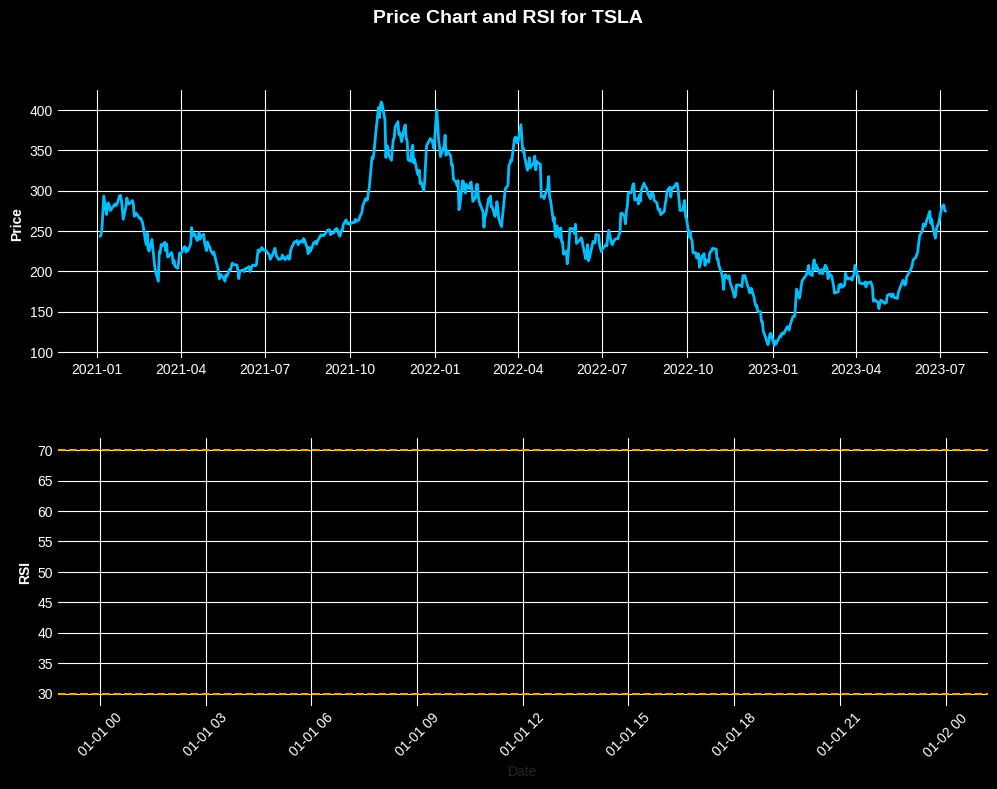

In [28]:
# Configure the look
plt.style.use('seaborn-darkgrid')

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# Plotting the Price Chart
line1 = ax1.plot(df.index, df['Close'], color='deepskyblue', linewidth=2)  # 두꺼운 선으로 변경
ax1.set_ylabel('Price', color='white', fontweight='bold')  # 텍스트 색상과 굵기 변경
ax1.tick_params('y', colors='white')

# Highlighting overbought and oversold regions
line2 = ax2.plot(df.index, df['rsi'], color='darkorange')
ax2.fill_between(df.index, 0, 30, where=(df['rsi'] <= 30), facecolor='green', alpha=1)
ax2.fill_between(df.index, 70, 100, where=(df['rsi'] >= 70), facecolor='red', alpha=0.8)
ax2.axhline(y=70, color='orange', linestyle='--')
ax2.axhline(y=30, color='orange', linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI', color='white', fontweight='bold')  # 텍스트 색상과 굵기 변경
ax2.tick_params('y', colors='white')

# Format x-axis labels
xticklabels = ax1.get_xticklabels()
ax1.set_xticklabels(xticklabels, color='white')  # x축 레이블 텍스트 색상 변경
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Set overall title for the plot
plt.suptitle('Price Chart and RSI for {}'.format(pair), fontsize=14, color='white', fontweight='bold')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Set plot background color
fig.patch.set_facecolor('black')
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Show the plot
plt.show()